## Does occurence of diabetes differ based on existence of other health conditions like obesity, high blood pressure, high cholesterol, stroke or heart attack ?

<h3><center> Prepared by: Gulen Kustutan </center></h3>

##### Background Information on Diabetes :
Diabetes is a chronic condition that is caused due to body's inability to effectively produce or efficiently use insulin hormone which regulates the way sugar used and stored in the body. This condition affects 10.5% of global adult population and 11.6% of US adult population (CDC reference). There is currently no cure for diabetes but the treatment can help manage the condition. In this data analysis study, we are aiming to study and understand if there is a relationship between the occurence of diabetes based on presence of other health factors such as obesity, high blood pressure, high cholesterol, stroke or heart disease.


##### Data Set : <br>
The dataset diabetes _ binary _ health _ indicators _ BRFSS2015.csv that is being used in this data analysis study contains 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. 
##### Dataset contains the following variables:
High Blood Pressure, High Cholesterol, Cholesterol Check, BMI, Smoker, Stroke, Heart Disease or Attack, Physical Activity, Fruits, Veggies, Heavy Alcohol Consumption, Any Healthcare, No Doctor because of Cost, General Health, Mental Health, Physical Health, Difficulty of Walking, Sex, Age, Education, and Income.<br>
##### Data Representation:
Responses of individuals who have attended to the survey have been marked as follows:<br>
0: This value signifies that the individual reported "No".<br>
1: This value signifies that the individual reported "Yes".<br>


##### Data Preparation:
Data preparation step involves loading the dataset into the Jupyter Notebook and exploring to understand the structure and features. If there are any columns or rows with missing values these should be removed before analysis.

In [234]:
#Load libraries
import numpy as np
import pandas as pd
from scipy import stats
import statistics as stat
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [235]:
#Load the dataset containing the survey responses of individuals
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [236]:
#Display the name of columns used in the dataset
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [237]:
# Display the columns that the dataset contains
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [238]:
# Displays the number of columns and rows that the dataset contains
print("diabetes_binary_health_indicators_BRFSS2015: {}".format(data.shape))

diabetes_binary_health_indicators_BRFSS2015: (253680, 22)


In [239]:
# Display the number of individuals who has diabetes vs indiduals who do not have diabetes
data.groupby('Diabetes_binary').size()

Diabetes_binary
0.0    218334
1.0     35346
dtype: int64

In [240]:
# Display any missing data 
data.isnull().sum()
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Correlation Matrix and Heatmap to Understand Relationship between Variables in Dataset

Creating a correlation matrix helps better visualize the relationship of variables in the dataset. To start our data analysis, we can create a correlation matrix of all variables in our dataset to find out which variables might have some kind of association. In a correlation matrix, each cell represents the correlation coefficient between two variables. A positive coefficient indicates a positive correlation, meaning that as one variable increases, the other variable also increases. A negative coefficient indicates a negative correlation which means that as one variable increases the other tends to decrease. Correlation coefficient ranges between -1 and 1. A correlation coefficient closer to either -1 and 1 indicates a stronger correlation while a value closer to 0 indicates a weaker correlation.  Heatmap function of Seaborn library provides us a coloured matrix that enables easy differentiation of correlated variables.

In [241]:
#Create a correlation matrix of diabetes and other 
spearman_corr_matrix = data.corr(method='spearman')
spearman_corr_matrix 

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.226314,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.287697,0.040049,0.156752,0.218344,0.031430,0.177684,-0.120038,-0.163305
HighBP,0.263129,1.000000,0.298199,0.098508,0.243756,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.303300,0.020499,0.149550,0.223618,0.052207,0.344535,-0.141970,-0.179161
HighChol,0.200276,0.298199,1.000000,0.085642,0.136298,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208640,0.044060,0.119331,0.144672,0.031205,0.266355,-0.068850,-0.087905
CholCheck,0.064761,0.098508,0.085642,1.000000,0.040285,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046351,-0.013270,0.030475,0.040585,-0.022115,0.093533,0.003870,0.015263
BMI,0.226314,0.243756,0.136298,0.040285,1.000000,0.023089,0.022428,0.063659,-0.144611,-0.096067,...,-0.013761,0.052151,0.257342,0.053936,0.116096,0.179543,0.089349,-0.024591,-0.123277,-0.092192
Smoker,0.060789,0.096991,0.091299,-0.009929,0.023089,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.159009,0.060940,0.093197,0.122463,0.093662,0.119304,-0.173566,-0.132663
Stroke,0.105816,0.129575,0.092620,0.024158,0.022428,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.163685,0.049819,0.127681,0.176567,0.002978,0.129060,-0.072970,-0.123728
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.063659,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.242243,0.034763,0.156630,0.212709,0.086096,0.227639,-0.095910,-0.141485
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.144611,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.256241,-0.082526,-0.179494,-0.253174,0.032482,-0.088049,0.200248,0.202022
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.096067,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.105474,-0.064153,-0.045278,-0.048352,-0.091175,0.066934,0.114929,0.076415


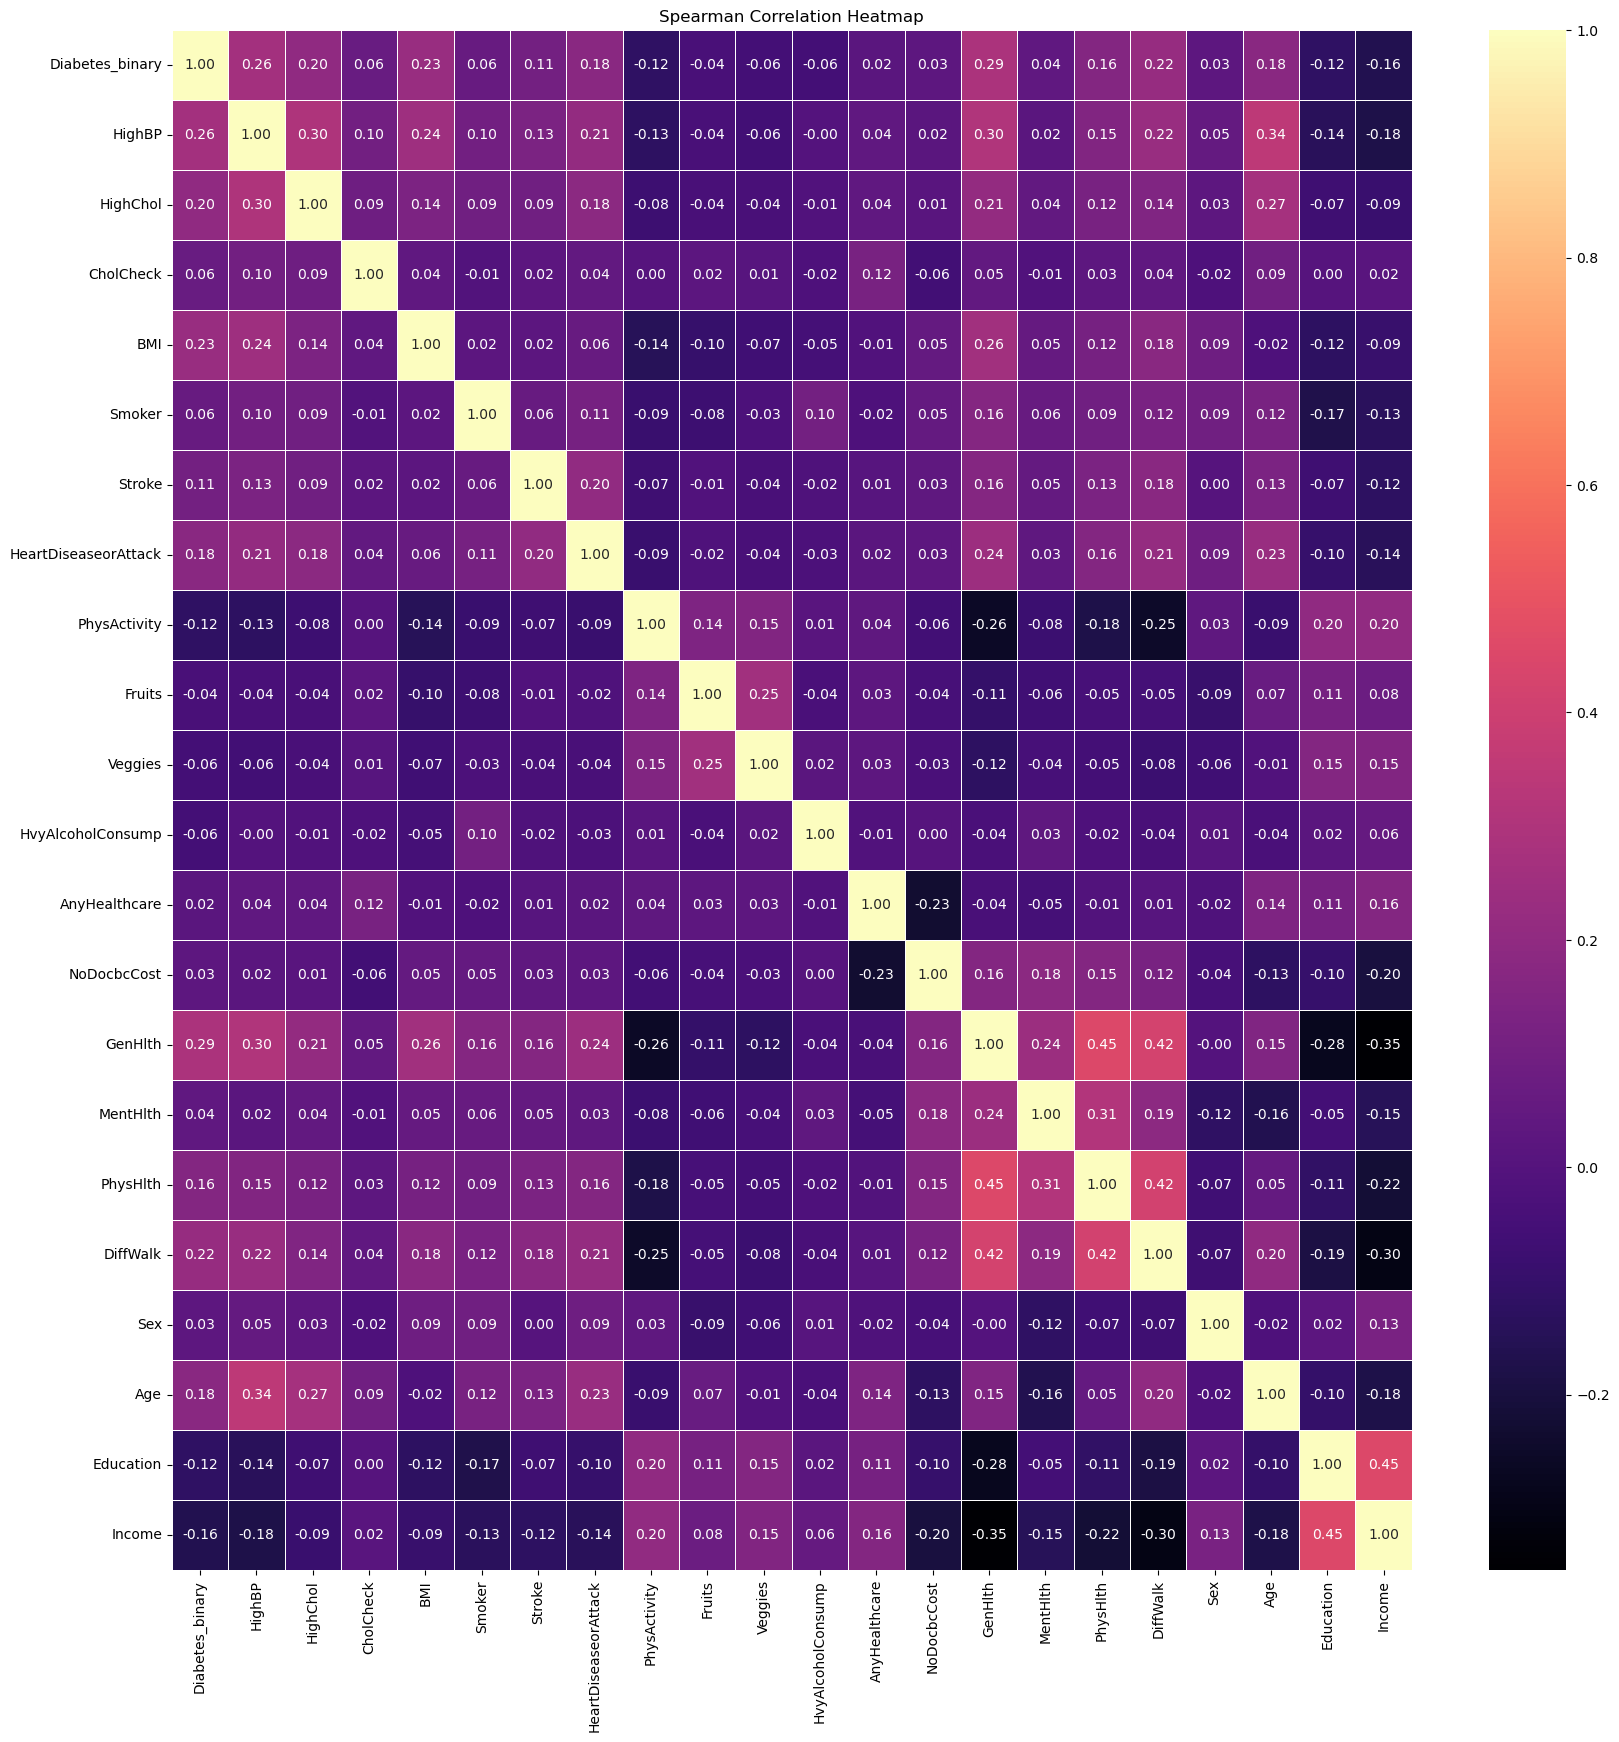

In [242]:
#Create a heatmap using seaborn library to better visualize the correlation
plt.figure(figsize=(20, 20))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

### Correlation Matrix and Heatmap of Diabetes and Other Health Conditions
To visualize the correlation of diabetes and other health conditions such as high blood pressure, high cholesterol, stroke, heart disease and BMI we can create a smaller correlation matrix and heatmap.

In [243]:
#Create a correlation matrix of diabetes and other 
health_conditions = data[['Diabetes_binary', 'HighBP', 'HighChol','Stroke','HeartDiseaseorAttack','BMI']]
spearman_corr_matrix = health_conditions.corr(method='spearman')
spearman_corr_matrix 

,Diabetes_binary,HighBP,HighChol,Stroke,HeartDiseaseorAttack,BMI
Diabetes_binary,1.000000,0.263129,0.200276,0.105816,0.177282,0.226314
HighBP,0.263129,1.000000,0.298199,0.129575,0.209361,0.243756
HighChol,0.200276,0.298199,1.000000,0.092620,0.180765,0.136298
Stroke,0.105816,0.129575,0.092620,1.000000,0.203002,0.022428
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.203002,1.000000,0.063659
BMI,0.226314,0.243756,0.136298,0.022428,0.063659,1.000000


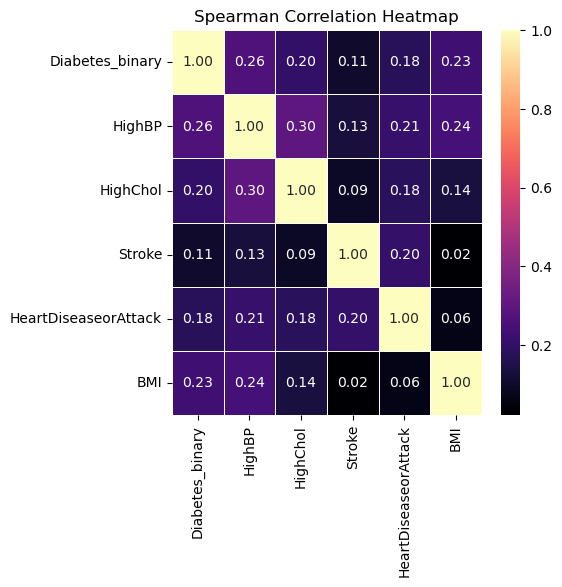

In [244]:
#Create a heatmap using seaborn library to better visualize the correlatio
plt.figure(figsize=(5, 5))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

### Bar Graph of Diabetes Occurence in Indivuduals with other Health Conditions
Bar graph is another great way of visualizing the relationship between two variables. By displaying percent occurence of diabetes in individuals with other health conditions, we can better understand if there is a relationship between diabetes and these conditions.

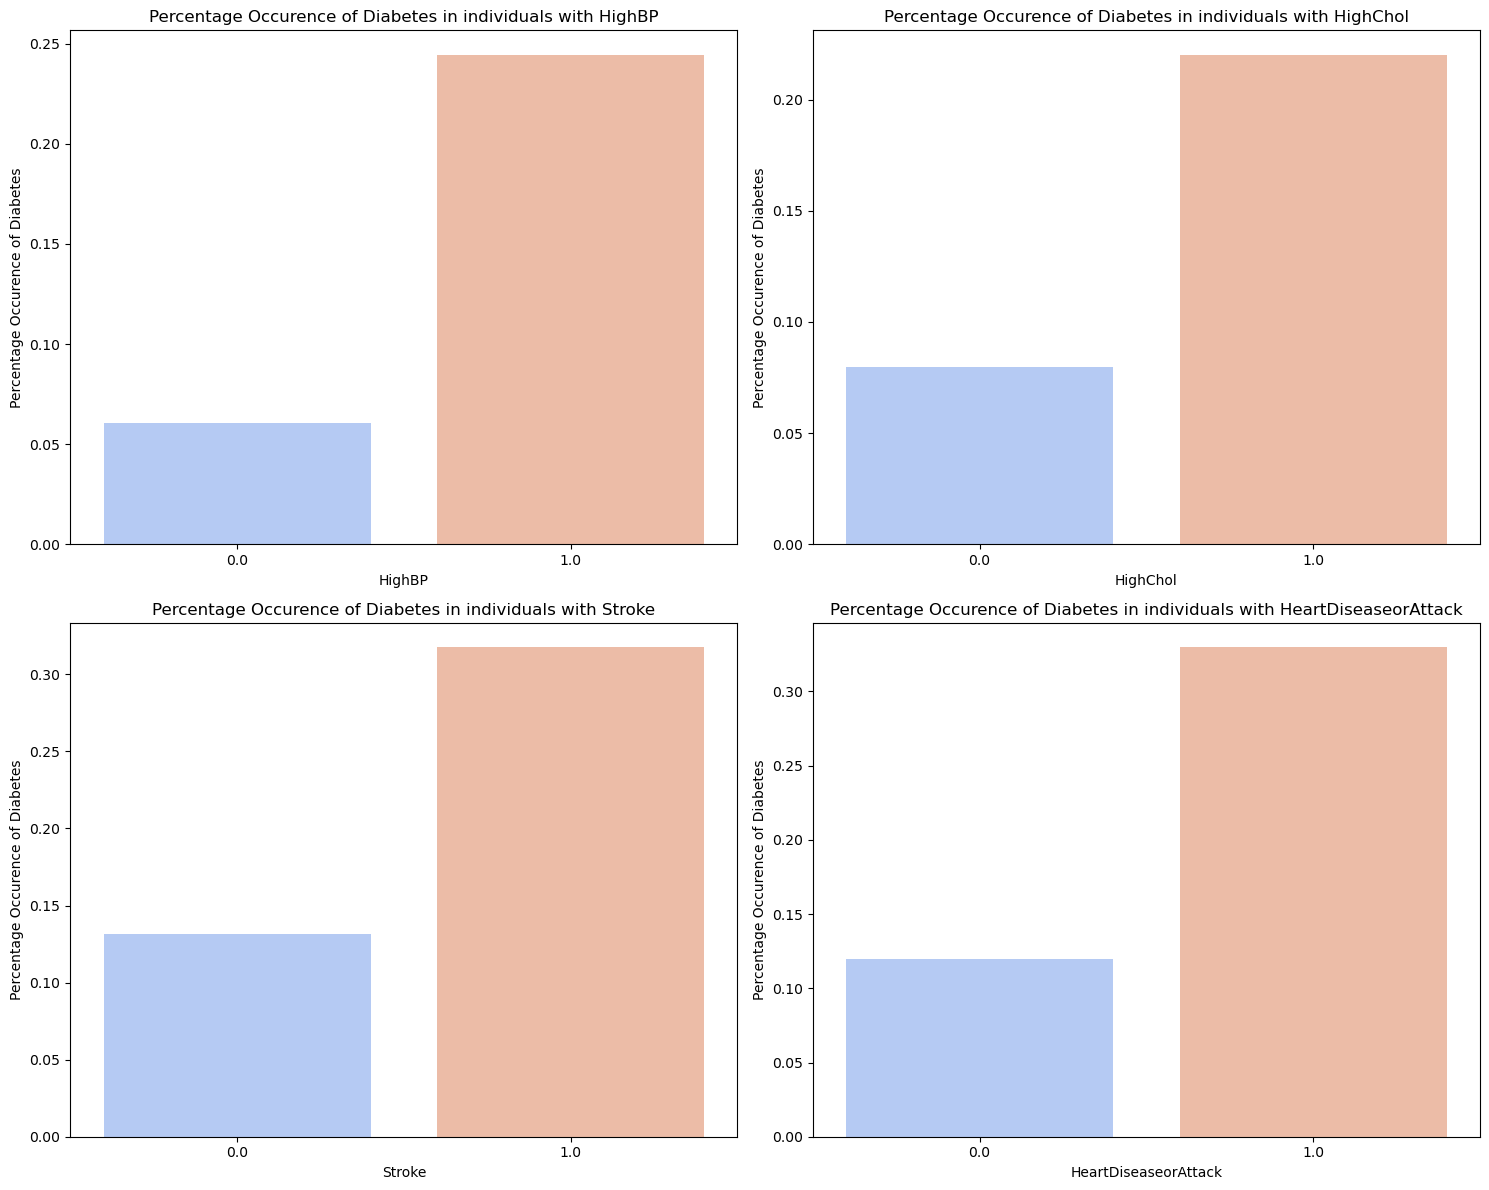

In [245]:
# Select the columns that contain variables like High Blood Pressure, High Cholesterol, Stroke and Heart Disease or Attack
categorical_variables = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']

# Set the plot size
plt.figure(figsize=(15, 12))

# Display plots for each selected variable
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(2, 2, i)
    
    # Calculate the probability of diabetes for each category
    percentage_diabetes_occurence = data.groupby(variable)['Diabetes_binary'].mean().reset_index()
    
    # Create a bar plot displaying occurence of diabetes in individuals with various health conditions
    sns.barplot(x=variable, y='Diabetes_binary', data=percentage_diabetes_occurence, palette='coolwarm')
    plt.title(f'Percentage Occurence of Diabetes in individuals with {variable}')
    plt.xlabel(variable)
    plt.ylabel('Percentage Occurence of Diabetes')

# Adjust layout for better visualization and show the plot
plt.tight_layout()
plt.show()

##### Interpretation of Bar Graphs Displaying Occurence of Diabetes in Individuals with and without Other Health Conditions
<br>- Bar graphs in the above visualization display the occurrence of diabetes among individuals with other health conditions such as high blood pressure, high cholesterol, heart attack, and stroke and individuals without these conditions.<br>
<br>- The height of bars in each bar graph represents the percentage of individuals with diabetes in each group. Occurence of diabetes is clearly higher in individuals diagnosed with other health conditions compared to individuals without any of these conditions.<br>
<br>- The interpretation of the graphs implies that the presence of health conditions such as high blood pressure, high cholesterol, heart attack, and stroke may contribute to increased likelihood of having diabetes.


### Histogram Displaying Probability of Diabetes Occurence in Individuals with Different BMIs

Visualising the occurance of diabetes in individuals with different BMIs is another great way of understanding if there is a relationship between diabetes and BMI.

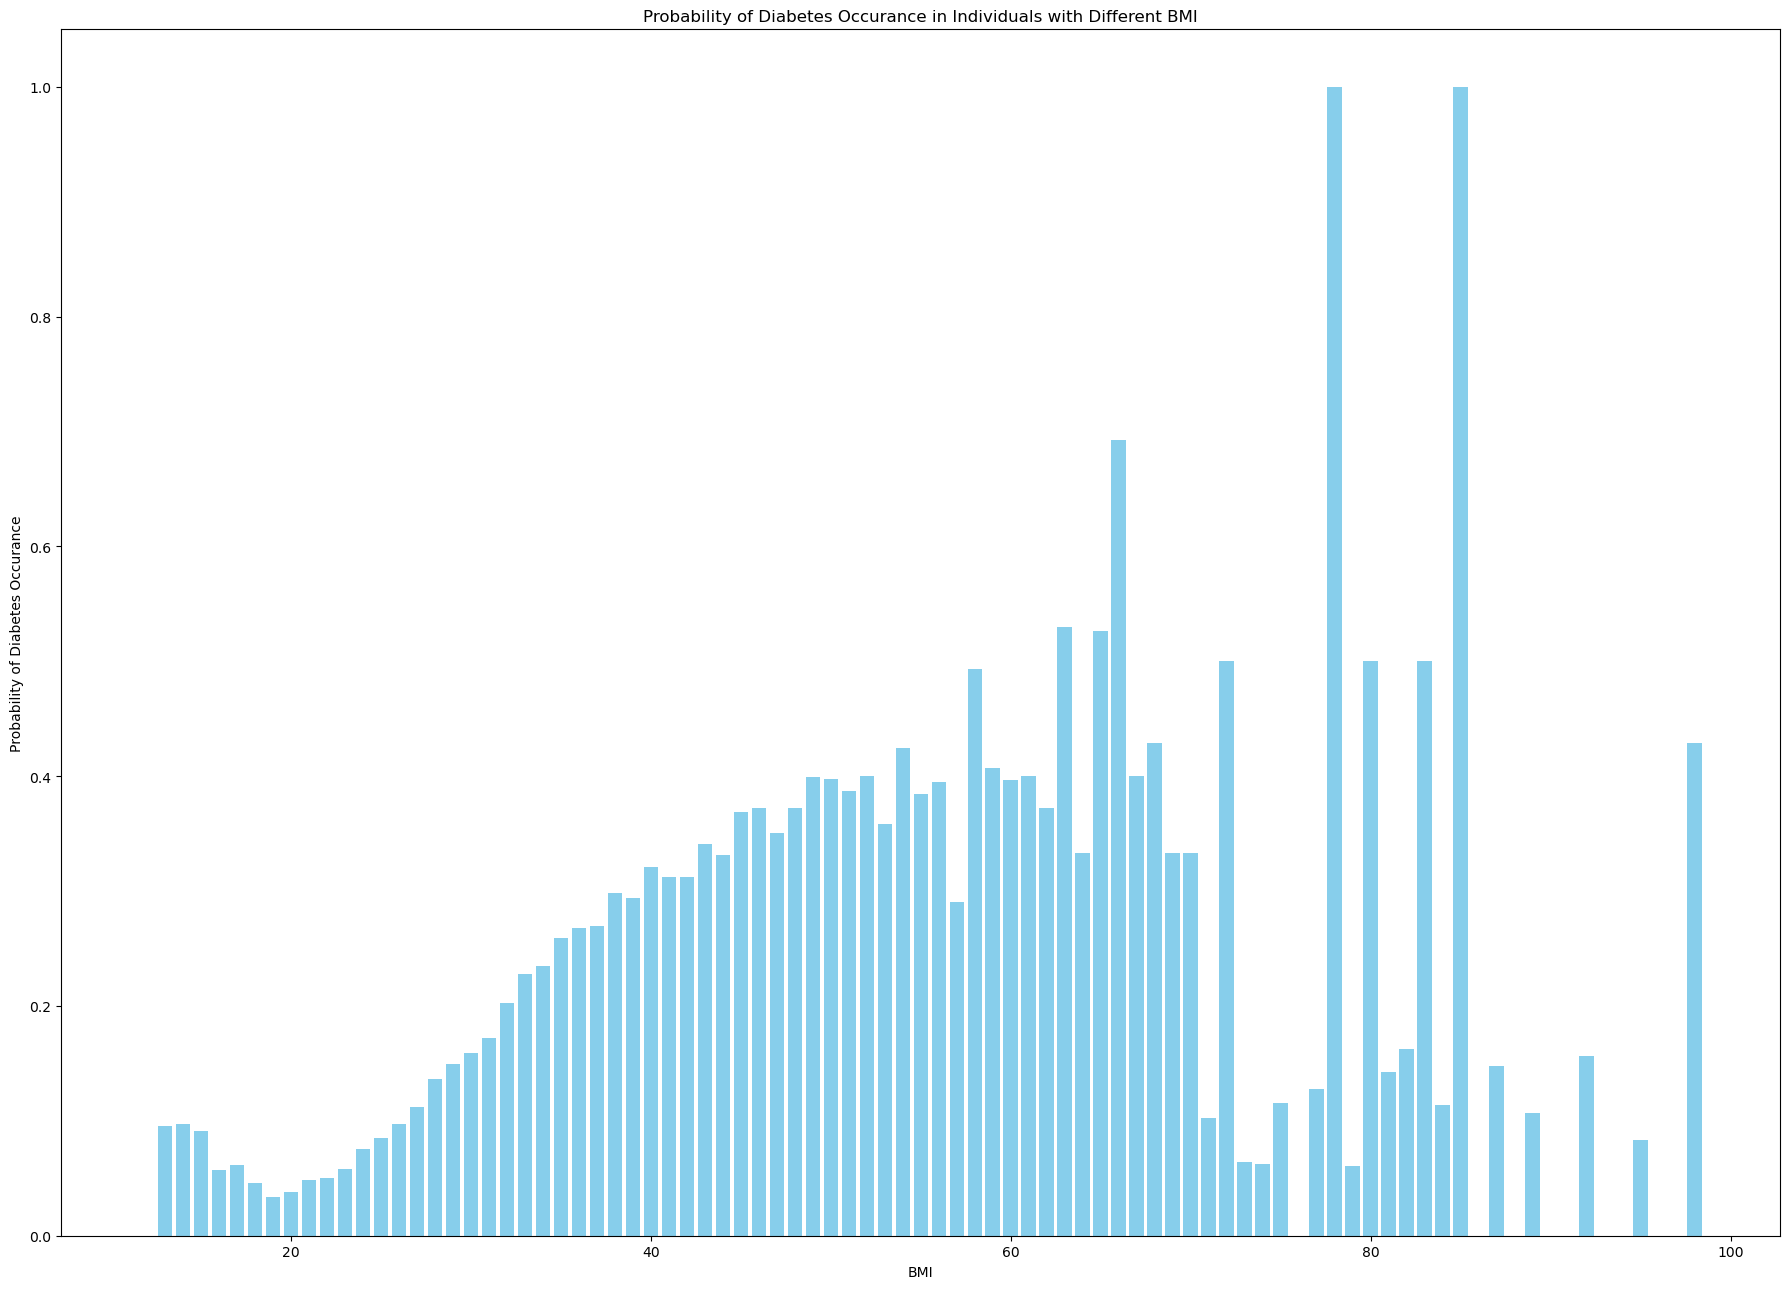

In [246]:
categorical_variables = ['BMI']

# Set the plot size
plt.figure(figsize=(18, 13))

# Display plots for each selected variable
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(1, 1, i)
    
    # Calculate the probability of diabetes for each category
    diabetes_probability = data.groupby(variable)['Diabetes_binary'].mean().reset_index()
    
    # Create a bar plot using matplotlib
    plt.bar(diabetes_probability[variable], diabetes_probability['Diabetes_binary'], width=0.8, color='skyblue')
    

    plt.title(f'Probability of Diabetes Occurance in Individuals with Different {variable}')
    plt.xlabel(variable)
    plt.ylabel('Probability of Diabetes Occurance')

# Adjust layout for better visualization and show the plot
plt.tight_layout()
plt.show()

##### Interpretation of Histogram of Percent Diabetes Occurence at Different BMIs
<br>- The histogram above provides insight to the relationship between the probability of having diabetes and various BMI values of individuals who have responded to the CDC's survey.<br>
<br>- x-axis of the histogram displays various BMI's of individuals. As per CDC's website BMI ranges and interpretation of each range is as follow:<br>
| BMI Range       | Category       |
| --------------- | -------------- |
| Below 18.5      | Underweight    |
| 18.5 – 24.9     | Healthy Weight |
| 25.0 – 29.9     | Overweight     |
| 30.0 and Above | Obesity        |<br>

<br>- Histogram clearly indicates that there is an increase in percentage of diabetes occurence as the individual's BMI increases.<br>
<br>- For individuals who are in underweight category with BMI Range below 18.5, as BMI decreases the percent occurence of diabetes increases. This may be an indication of other underlying conditions that might need more investigation and analysis.<br>


### Performing Chi-Square Statistical Test to Understand the Relationship between BMI and Diabetes

Chi-square test is a statistical test that enables us to understand the relationship between the categorical variables of a dataset. By performing chi-square testing we can further analyze the relationship between various BMI categories such as Underweight, Healthy Weight, Over Weight, Obesity and occurence of diabetes in these individuals.<br>

In order to perform hypotesis testing we need to define null and alternate hypothesis.<br>
#### Null hypothesis: 
There is no significant association between diabetes occurrence and different BMI categories<br>
#### Alternate hypothesis: 
There is a significant association between diabetes occurence and different BMI categories<br>
<br> To start our testing, dataset needs to be split into two set: indivuduals who have diabetes and individuals who do not have diabetes.<br>
<br> Once we have created these two datasets, we can further filter each dataset to categorize individuals based on their BMI and find out observed and expected values for each BMI category and diabetes condition.

In [247]:
#filter the data to select only those individuals who have diabetes
diabetic_individuals = data[data['Diabetes_binary']==1]
diabetic_individuals

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,1.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,1.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,1.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
253668,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [248]:
#filter the data to select only those individuals who do not have diabetes
non_diabetic_individuals = data[data['Diabetes_binary']==0]
non_diabetic_individuals

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0


In [249]:
#Create a dictionary that contains the values for each BMI category
categories = {
    'Underweight': (0, 18.5),
    'Healthy Weight': (18.5, 25),
    'Overweight': (25, 30),
    'Obesity': (30, float('inf'))}

# Calculate the number of diabetic individuals in each BMI category  
bmi_categories = {}
for category in categories:
    bmi_categories[category] = ((diabetic_individuals['BMI'] >= categories[category][0]) & (diabetic_individuals['BMI'] < categories[category][1])).sum()

# Print results for each category
for category in bmi_categories:
    print(category, ':', bmi_categories[category])

Underweight : 169
Healthy Weight : 3928
Overweight : 10692
Obesity : 20557


In [250]:
#Create a dictionary that contains the values for each BMI category
categories = {
    'Underweight': (0, 18.5),
    'Healthy Weight': (18.5, 25),
    'Overweight': (25, 30),
    'Obesity': (30, float('inf'))}

# Calculate the number of non-diabetic individuals in each BMI category  
bmi_categories = {}
for category in categories:
    bmi_categories[category] = ((non_diabetic_individuals['BMI'] >= categories[category][0]) & (non_diabetic_individuals['BMI'] < categories[category][1])).sum()

# Print results for each category
for category in bmi_categories:
    print(category, ':', bmi_categories[category])

Underweight : 2958
Healthy Weight : 65025
Overweight : 83057
Obesity : 67294


##### Record the findings in a table format to better visualize the observed number of individuals in each category
<h3><center> Observed Number of Diabetic and Non-Diabetic Individuals in Each BMI Category </center></h3>

|BMI Category     | Diabetic       | Non-Diabetic     |Row Total  |
| --------------- | -------------- | ---------------- |---------- |
| Underweight     | 169            | 2958             | 3127      |
| Healthy Weight  | 3928           | 65025            | 68953     |
| Overweight      | 10692          | 83057            | 93749     |
| Obesity         | 20557          | 67294            | 87851     |
|Column Total     | 35346          | 218334           | 253680    |

In [251]:
#Calculate expected number of underweight diabetic patients
underweight_diabetic= ((169+2958)*(169+3928+10692+20557))/253680
underweight_diabetic

435.6943472090823

In [252]:
#Calculate expected number of underweight non-diabetic patients
underweight_nondiabetic= ((169+2958)*(2958+65025+83057+67294))/253680
underweight_nondiabetic

2691.3056527909175

In [253]:
#Calculate expected number of healthy weight diabetic patients
healthy_diabetic= ((3928+65025)*(169+3928+10692+20557))/253680
healthy_diabetic

9607.4295884579

In [254]:
#Calculate expected number of healthy weight non-diabetic patients
healthy_nondiabetic= ((3928+65025)*(2958+65025+83057+67294))/253680
healthy_nondiabetic

59345.5704115421

In [255]:
#Calculate expected number of overweight diabetic patients
overweight_diabetic= (( 10692+83057 )*(169+3928+10692+20557))/253680
overweight_diabetic

13062.33110217597

In [256]:
#Calculate expected number of overweight non-diabetic patients
overweight_nondiabetic= ((10692+83057)*(2958+65025+83057+67294))/253680
overweight_nondiabetic

80686.66889782403

In [257]:
#Calculate expected number of obese diabetic patients
obese_diabetic= ((20557+67294 )*(169+3928+10692+20557))/253680
obese_diabetic

12240.544962157048

In [258]:
#Calculate expected number of obese non-diabetic patients
obese_nondiabetic= ((20557+67294 )*(2958+65025+83057+67294))/253680
obese_nondiabetic

75610.45503784296

##### Record the findings in a table format to better visualize the observed number of individuals in each category

<h3><center> Expected Number of Diabetic and Non-Diabetic Individuals in Each BMI Category </center></h3>

|BMI Category     | Diabetic        | Non-Diabetic     |Row Total  |
| --------------- | --------------- | ---------------- |---------- |
| Underweight     | 436             | 2691             | 3127      |
| Healthy Weight  | 9607            | 59346            | 68953     |
| Overweight      | 13062           | 80687            | 93749     |
| Obesity         | 12241           | 75610            | 87851     |
|Column Total     | 35346           | 218334           | 253680    |

In [259]:
#perform chi-square statistical test
chi_square = ((169-436)**2/436)+((3928-9607)**2/9607)+((10692-13062)**2/13062)+((20557-12241)**2/12240)+((2958-2691)**2/2691)+((65025-59346)**2/59346)+((83057-80687)**2/80687)+((67294-75610)**2/75610)
chi_square

11154.73404364663

##### Find out the degree of freedom
<br>df=(number of rows-1)*(number of columns-1)
df=(4-1)*(2-1)<br>  df=3

In [260]:
#Calculate the critical value of chi-square with a degree of freedom 3 and at 95% confidence interval
critical_value = stats.chi2.ppf(q=0.95, df = 3)
critical_value

7.814727903251179

#### Result interpretation:
Since the calculated value of chi-square statistical value of 11154.7 is much greater than the critical value of chi-square 7.81 we will reject the null hypothesis which states that the is no significant association between diabetes occurrence and different BMI categories. According to our statistical test result there is a significan association between diabetes occurence and BMI categories.

### Performing Chi-Square Statistical Test to Understand the Relationship between Other Health Conditions and Diabetes

Chi-Square statistical test could further be applied to find out if there is a significant association between presence of diabetes in individuals with other health conditions such as high blood pressure, high cholesterol, stroke and heart disease or attack.

We could once again state our null and alternate hypothesis as follows:

##### Null Hypothesis: 
There is no significant association between occurence of diabetes and other health conditions
##### Alternate Hypothesis: 
There is a significant association between occurence of diabetes and other health conditions

#### High Blood Pressure:

In [261]:
#filter the data to select only the individuals with diabetes
diabetic_individuals = data[data['Diabetes_binary']==1]

# count the number of individuals who have diabetes and high blood pressure
HighBP_diabetic_individuals = diabetic_individuals['HighBP'].value_counts()

# display the number of diabetic individuals with and without high blood pressure
print("Number of diabetic individuals with and without high blood pressure is:")
HighBP_diabetic_individuals

Number of diabetic individuals with and without high blood pressure is:


1.0    26604
0.0     8742
Name: HighBP, dtype: int64

In [262]:
#filter the data to select only the individuals without diabetes
nondiabetic_individuals = data[data['Diabetes_binary']==0]

#count the number of individuals who have diabetes and are smoking vs non-smoking
HighBP_nondiabetic_individuals = nondiabetic_individuals['HighBP'].value_counts()

#display the number of non-diabetic individuals with and without high blood pressure
print("Number of non-diabetic individuals with and without high blood pressure is:")
HighBP_nondiabetic_individuals

Number of non-diabetic individuals with and without high blood pressure is:


0.0    136109
1.0     82225
Name: HighBP, dtype: int64

##### Record the findings in a table format to better visualize the observed number of individuals in each category

<h3><center> Observed Number of Diabetic and Non-Diabetic Individuals With and Without High Blood Pressure </center></h3>

|BP Condition     | Diabetic       | Non-Diabetic     |Row Total  |
| --------------- | -------------- | ---------------- |---------- |
| High BP         | 26604          | 82225            | 108829    |
| Without High BP | 8742           | 136109           | 144851    |
| Column Total    | 35346          | 218334           | 253680    |

##### Calculate the expected number of individuals in each category

In [263]:
#Calculate expected number of individuals with high blood pressure and diabetes
expected_HighBP_diabetic= ((26604+82225)*(26604+8742))/253680
print('Expected number of diabetic individuals with high blood pressure:', expected_HighBP_diabetic)

Expected number of diabetic individuals with high blood pressure: 15163.473013245033


In [264]:
#Calculate expected number of individuals without high blood pressure and diabetes
expected_NoHighBP_diabetic =((8742+136109)*(26604+8742))/253680
print('Expected number of diabetic individuals without high blood pressure:',expected_NoHighBP_diabetic)

Expected number of diabetic individuals without high blood pressure: 20182.52698675497


In [265]:
#Calculate expected number of individuals with high blood pressure and without diabetes
expected_HighBP_nondiabetic= ((26604+82225)*(136109+82225))/253680
print('Expected number of non-diabetic individuals with high blood pressure:',expected_HighBP_nondiabetic)

Expected number of non-diabetic individuals with high blood pressure: 93665.52698675497


In [266]:
#Calculate expected number of individuals without high blood pressure and without diabetes
expected_NoHighBP_nondiabetic =((8742+136109)*(136109+82225))/253680
print('Expected number of non-diabetic individuals without high blood pressure:',expected_NoHighBP_nondiabetic)

Expected number of non-diabetic individuals without high blood pressure: 124668.47301324503


##### Record the findings in a table format to better visualize the expected number of individuals in each category

<h3><center> Expected Number of Diabetic and Non-Diabetic Individuals With and Without High Blood Pressure </center></h3>

|BP Condition     | Diabetic       | Non-Diabetic     |Row Total  |
| --------------- | -------------- | ---------------- |---------- |
| High BP         | 15163          | 93666            | 108829    |
| Without High BP | 20183          | 124668           | 144851    |
| Column Total    | 35346          | 218334           | 253680    |

##### Perform Chi-Square Statistical test 

In [267]:
#perform chi-square statistical test
chi_square_BP = ((26604-15163)**2/15163)+((8742-20183)**2/20183)+((136109-93666)**2/93666)+((82225-124668)**2/124668)
print('Chi-square statistical test:',chi_square_BP)

Chi-square statistical test: 48800.00377639661


#### High Cholesterol:

In [268]:
#filter the data to select only the individuals with diabetes
diabetic_individuals = data[data['Diabetes_binary']==1]

#Count the number of individuals who have diabetes and high cholesterol levels
HighChol_diabetic_individuals = diabetic_individuals['HighChol'].value_counts()

# Display the number of diabetic individuals with and without high cholesterol levels
print("Number of diabetic individuals with and without high cholesterol levels is:")
HighChol_diabetic_individuals

Number of diabetic individuals with and without high cholesterol levels is:


1.0    23686
0.0    11660
Name: HighChol, dtype: int64

In [269]:
#filter the data to select only the individuals without diabetes
nondiabetic_individuals = data[data['Diabetes_binary']==0]

# Count the number of individuals who have diabetes with and without high cholesterol
HighChol_nondiabetic_individuals = nondiabetic_individuals['HighChol'].value_counts()

# Display the number of non-diabetic individuals with and without high cholesterol
print("Number of non-diabetic individuals with and without high cholesterol levels is:")
HighChol_nondiabetic_individuals

Number of non-diabetic individuals with and without high cholesterol levels is:


0.0    134429
1.0     83905
Name: HighChol, dtype: int64

##### Record the findings in a table format to better visualize the observed number of individuals in each category

<h3><center> Observed Number of Diabetic and Non-Diabetic Individuals With and Without High Cholesterol </center></h3>

|Cholesterol Condition | Diabetic       | Non-Diabetic     |Row Total  |
| -------------------- | -------------- | ---------------- |---------- |
| High Chol            | 23686          | 83905            | 107591    |
| Without High Chol    | 11660          | 134429           | 146089    |
| Column Total         | 35346          | 218334           | 253680    |

In [270]:
#Calculate expected number of individuals with high cholesterol and diabetes
expected_HighChol_diabetic= ((23686+83905)*(23686+11660))/253680
print('Expected number of diabetic individuals with high cholesterol:', expected_HighChol_diabetic)

Expected number of diabetic individuals with high cholesterol: 14990.978736991485


In [271]:
#Calculate expected number of individuals without high cholesterol and diabetes
expected_NoHighChol_diabetic =((11660 + 134429)*(23686+11660))/253680
print('Expected number of diabetic individuals without high cholesterol:',expected_NoHighChol_diabetic)

Expected number of diabetic individuals without high cholesterol: 20355.021263008515


In [272]:
#Calculate expected number of individuals with high cholesterol and without diabetes
expected_HighChol_nondiabetic= ((23686+83905)*(134429+83905))/253680
print('Expected number of non-diabetic individuals with high cholesterol:',expected_HighChol_nondiabetic)

Expected number of non-diabetic individuals with high cholesterol: 92600.02126300852


In [273]:
#Calculate expected number of individuals without high cholesterol and without diabetes
expected_NoHighChol_nondiabetic =((11660 + 134429)*(134429+83905))/253680
print('Expected number of non-diabetic individuals without high cholesterol:',expected_NoHighChol_nondiabetic)

Expected number of non-diabetic individuals without high cholesterol: 125733.97873699148


##### Record the findings in a table format to better visualize the observed number of individuals in each category

<h3><center> Expected Number of Diabetic and Non-Diabetic Individuals With and Without High Cholesterol </center></h3>

|Cholesterol Level | Diabetic       | Non-Diabetic     |Row Total  |
| ---------------- | -------------- | ---------------- |---------- |
| High Chol        | 14991          | 92600            | 107591    |
| Without High Chol| 20355          | 125734           | 146089    |
| Column Total     | 35346          | 218334           | 253680    |

In [274]:
#perform chi-square statistical test
chi_square_chol = ((23686-14991)**2/14991)+((11660-20355)**2/20355)+((134429-92600)**2/92600)+((83905-125734)**2/125734)
print('Chi-square statistical value:',chi_square_chol)

Chi-square statistical value: 41567.93386332598


#### Stroke:

In [275]:
#filter the data to select only the individuals with diabetes
diabetic_individuals = data[data['Diabetes_binary']==1]

#Count the number of individuals who have diabetes and had or never had a stroke
Stroke_diabetic_individuals = diabetic_individuals['Stroke'].value_counts()

# Display the number of diabetic individuals who had and never had a stroke
print("Number of diabetic individuals who had and never had a stroke is:")
print(Stroke_diabetic_individuals)

Number of diabetic individuals who had and never had a stroke is:
0.0    32078
1.0     3268
Name: Stroke, dtype: int64


In [276]:
#filter the data to select only the individuals without diabetes
nondiabetic_individuals = data[data['Diabetes_binary']==0]

# Count the number of individuals who are non-diabetic and had or never had a stroke
Stroke_nondiabetic_individuals = nondiabetic_individuals['Stroke'].value_counts()

# Display the number of non-diabetic individuals who had or never had a stroke
print("Number of non-diabetic individuals who had and never had a stroke is:")
print(Stroke_nondiabetic_individuals)

Number of non-diabetic individuals who had and never had a stroke is:
0.0    211310
1.0      7024
Name: Stroke, dtype: int64


##### Record the findings in a table format to better visualize the observed number of individuals in each category

<h3><center> Observed Number of Diabetic and Non-Diabetic Individuals Who Had and Never Had a Stroke </center></h3>

|Stroke             | Diabetic       | Non-Diabetic     |Row Total  |
| ----------------- | -------------- | ---------------- |---------- |
| Had a Stroke      | 3268           | 7024             | 158115    |
| Never Had a Stroke| 32078          | 211310           | 95565     |
| Column Total      | 35346          | 218334           | 253680    |

In [277]:
#Calculate expected number of individuals who had a stroke and has diabetes
expected_stroke_diabetic= ((3268+7024)*(3268+32078))/253680
print('Expected number of diabetic individuals who had a stroke:', expected_stroke_diabetic)

Expected number of diabetic individuals who had a stroke: 1434.0154210028381


In [278]:
#Calculate expected number of individuals who never had a stroke and has diabetes
expected_NoStroke_diabetic =((32078+211310)*(3268+32078))/253680
print('Expected number of diabetic individuals who never had a stroke:',expected_NoStroke_diabetic)

Expected number of diabetic individuals who never had a stroke: 33911.98457899716


In [279]:
#Calculate expected number of individuals who had a stroke and without diabetes
expected_stroke_nondiabetic= ((3268+7024)*(7024+211310))/253680
print('Expected number of non-diabetic individuals who had a stroke:',expected_stroke_nondiabetic)

Expected number of non-diabetic individuals who had a stroke: 8857.984578997162


In [280]:
#Calculate expected number of individuals without strokel and without diabetes
expected_NoStroke_nondiabetic =((32078 + 211310)*(7024+211310))/253680
print('Expected number of non-diabetic individuals who never had a stroke:',expected_NoStroke_nondiabetic)

Expected number of non-diabetic individuals who never had a stroke: 209476.01542100284


##### Record the findings in a table format to better visualize the observed number of individuals in each category

<h3><center> Expected Number of Diabetic and Non-Diabetic Individuals Who Had and Never Had a Stroke </center></h3>

|Stroke             | Diabetic       | Non-Diabetic     |Row Total  |
| ----------------- | -------------- | ---------------- |---------- |
| Had a Stroke      | 1434           | 8858             | 158115    |
| Never Had a Stroke| 33912          | 209476           | 95565     |
| Column Total      | 35346          | 218334           | 253680    |

In [281]:
#perform chi-square statistical test
chi_square_stroke = ((3268-1434)**2/1434)+((32078-33912)**2/33912)+((7024-8858)**2/8858)+((211310-209476)**2/209476)
chi_square_stroke

2840.53741738055

#### Heart Disease or Attack:

In [282]:
#filter the data to select only the individuals with heart disease or attack
diabetic_individuals = data[data['Diabetes_binary']==1]

#Count the number of individuals who have diabetes and has heart disease or attack
HeartDisease_diabetic_individuals = diabetic_individuals['HeartDiseaseorAttack'].value_counts()

# Display the number of diabetic individuals with and without heart disease or attack
print("Number of diabetic individuals with and without heart disease or attack is:")
HeartDisease_diabetic_individuals

Number of diabetic individuals with and without heart disease or attack is:


0.0    27468
1.0     7878
Name: HeartDiseaseorAttack, dtype: int64

In [283]:
#filter the data to select only the individuals without heart disease or attack
nondiabetic_individuals = data[data['Diabetes_binary']==0]

# Count the number of individuals who are non-dabetic and have heart disease or attack
HeartDisease_nondiabetic_individuals = nondiabetic_individuals['HeartDiseaseorAttack'].value_counts()

# Display the number of non diabetic individuals with or withour heart disease or attack
print("Number of non-diabetic individuals with and without heart disease or attack is:")
HeartDisease_nondiabetic_individuals

Number of non-diabetic individuals with and without heart disease or attack is:


0.0    202319
1.0     16015
Name: HeartDiseaseorAttack, dtype: int64

##### Record the findings in a table format to better visualize the observed number of individuals in each category

<h3><center> Observed Number of Diabetic and Non-Diabetic Individuals Who Had and Never Had a Heart Attack or Disease </center></h3>

|Heart Disease/Attack            | Diabetic       | Non-Diabetic     |Row Total  |
| ------------------------------ | -------------- | ---------------- |---------- |
| Has Heart Disease/Attack       | 7878           | 16015            | 23893     |
| Never Had Heart Disease/Attack | 27468          | 202319           | 229787    |
| Column Total                   | 35346          | 218334           | 253680    |

In [284]:
#Calculate expected number of individuals who has a heart disease or attack and has diabetes
expected_HeartAttack_diabetic= ((7878+16015)*(7878+27468))/253680
print('Expected number of diabetic individuals who had a heart disease or attack:',expected_HeartAttack_diabetic)

Expected number of diabetic individuals who had a heart disease or attack: 3329.083798486282


In [285]:
#Calculate expected number of individuals who never had a heart disease or attack and has diabetes
expected_NoHeartAttack_diabetic= ((27468+202319)*(7878+27468))/253680
print('Expected number of diabetic individuals who never had a heart disease or attack:',expected_NoHeartAttack_diabetic)

Expected number of diabetic individuals who never had a heart disease or attack: 32016.91620151372


In [286]:
#Calculate expected number of individuals who has a heart disease or attack and non-diabetic
expected_HeartAttack_nondiabetic= ((7878+16015)*(16015+202319))/253680
print('Expected number of non-diabetic individuals who had a heart disease or attack',expected_HeartAttack_nondiabetic)

Expected number of non-diabetic individuals who had a heart disease or attack 20563.91620151372


In [287]:
#Calculate expected number of individuals who never had a heart disease or attack and non-diabetic
expected_HeartAttack_nondiabetic= ((27468+202319)*(16015+202319))/253680
print('Expected number of non-diabetic individuals who never had a heart disease or attack:',expected_HeartAttack_nondiabetic)

Expected number of non-diabetic individuals who never had a heart disease or attack: 197770.08379848627


##### Record the findings in a table format to better visualize the observed number of individuals in each category

<h3><center> Expected Number of Diabetic and Non-Diabetic Individuals Who Had and Never Had a Heart Attack or Disease </center></h3>

|Heart Disease/Attack            | Diabetic       | Non-Diabetic     |Row Total  |
| ------------------------------ | -------------- | ---------------- |---------- |
| Has Heart Disease/Attack       | 3329           | 20564            | 23893     |
| Never Had Heart Disease/Attack | 32017          | 197770           | 229787    |
| Column Total                   | 35346          | 218334           | 253680    |

In [288]:
#perform chi-square statistical test
chi_square_stroke = ((7878-3329)**2/3329)+((27468-32017)**2/32017)+((16015-20564)**2/20564)+((202319-197770)**2/197770)
chi_square_stroke

7973.352921612689

##### Find out the degree of freedom
df=(number of rows-1)(number of columns-1) df=(2-1)(2-1) df=1

In [289]:
#Calculate the critical value of chi-square with a degree of freedom 1 and at 95% confidence interval

critical_value = stats.chi2.ppf(q=0.95, df = 1)
critical_value

3.841458820694124

### Interpretation of results:

The chi-square statistic which measures the relationship between two categorical variables has been used to find out the association for different health conditions in relation to diabetes. The critical value of the chi-square statistic 3.84 has been calculated for 95% confidence interval and the degree of freedom of 1. 

After conducting chi-square statistical analysis for diabetic and non diabetic individuals with and without other health conditions such as high blood pressure, high cholesterol, stroke and heart disease or attack, we have the following results for chi-square statistic:

Chi-square statistic for diabetes and high blood pressure: 48800<br>
Chi-square statistic for diabetes and high cholesterol: 41568<br>
Chi-square statistic for diabetes and stroke:2840.5<br>
Chi-square statistic for diabetes and heart disease or attack:7973.4<br>


The chi-square statistical value for all health conditions are much greater than the critical value which indicates that there is a significant association between diabetes and these health conditions. Based on the comparison of chi-square statistic results and critical value we can confidently reject the null hypothesis which assumes that there is no significant association between diabetes and other health conditions. 


# Conclusion

In the heart of our study, we asked the following question: Does diabetes have a connection with other health factors like obesity, high blood pressure, high cholesterol, stroke or heart attack?

We began our analysis using various helpful tools. Numpy provided us with the power to handle numbers, while Pandas allowed us to organize our data. Scipy and Statistics came to our aid when it was time for analysis, and Matplotlib and Seaborn lent their expertise in crafting visually appealing data representations. With great care, we loaded our dataset named 'diabetes_binary_health_indicators_BRFSS2015.csv' consisting of 253,680 CDC's survey responses into a Pandas DataFrame, marking the commencement of our research journey.

We began by closely examining the data, grouping it, tallying important details, ensuring that no crucial information was left out. Our focus then shifted towards individuals with diabetes, delving deeper into their characteristics. To gain a comprehensive understanding of the relationships between various factors, we employed a special chart known as a Spearman correlation matrix. This matrix was transformed into a captivating heatmap, illuminating the interconnections between different variables. 

We have displayed the probability of diabetes occurence in individuals with other health conditions using bar graphs. The results indicated a higher probability of diabetes occurence in individuals with other health conditions. Displaying probability of diabetes occurence at different BMI levels indicated that there is an increasing occurence of diabetes in individuals with higher BMI values.

We have clearly formulated our null and alternative hypotheses. The null hypothesis stated that there is no difference in the occurrence of diabetes based on other health factors, while the alternative hypothesis suggested that the occurrence of diabetes differs based on health factors.

The chi-square statistical test was employed to further investigate the relationship between diabetes occurrence and BMI categories. The results of this test revealed a significant association between diabetes occurrence and different BMI categories, with a calculated chi-square statistic considerably higher than the critical value.


Similarly, chi-square statistical tests were also applied to explore the relationship between diabetes and other health conditions, such as high blood pressure, high cholesterol, stroke, and heart disease or attack. In all cases, the chi-square statistics were markedly higher than the critical values, leading to the rejection of the null hypothesis. This indicates a significant association between diabetes and these health conditions.

The results provide strong evidence that diabetes is significantly associated with high blood pressure, high cholesterol, stroke, and heart disease or attack. This has implications for understanding the relationships between these health conditions and indicates the importance of considering these factors in the context of diabetes management and prevention.

While statistical significance is important, it's also valuable to consider the practical significance of the findings. In a real-world context, understanding the strength of these associations and their implications for healthcare and public health interventions can be crucial.


# Insights:

- Having high blood pressure, high cholesterol, stroke, heart attack and being overweight (having a higher BMI) increases the chances of getting diabetes. This matches what doctors already know about these things being risky for diabetes.

- Engaging in regular physical activity has been found to have a negative correlation with diabetes, indicating that individuals who are more physically active have a lower risk of developing the condition.

- Socioeconomic factors such as education and income also shows negative correlations with diabetes, suggesting that individuals with higher socioeconomic status may have a lower chances of developing the disease.

- It is worth noting that mental health and physical health have positive correlations with diabetes, possibly indicating that diabetes can impact or is associated with other health issues.

- Based on our data, it seems like we should focus on helping people with high blood pressure, especially if we want to prevent diabetes.

- The analysis supports the alternative hypothesis that the occurrence of diabetes varies based on health factors, rather than the null hypothesis that there is no difference in diabetes occurrence based on other health factors. However, it is important to note that correlation does not imply causation, and further statistical testing would be required to validate these findings.

# References:

- Teboul, A. (n.d.). Diabetes Health Indicators Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset<br>


- Centers for Disease Control and Prevention. (n.d.). What is Diabetes? Retrieved from https://www.cdc.gov/diabetes/basics/diabetes.html<br>


- Government of Canada. (n.d.). Your Guide to Diabetes. Public Health Agency of Canada. Retrieved from https://www.canada.ca/en/public-health/services/publications/diseases-conditions/your-guide-diabetes.html<br>


- Lontchi-Yimagou, E., Dasgupta, R., Anoop, S., Kehlenbrink, S., Koppaka, S., Goyal, A., Venkatesan, P., Livingstone, R. S., Ye, K., Chapla, A., Carey, M. A., Jose, A., Rebekah, G., Wickramanayake, A., Joseph, M., Mathias, P., Manavalan, A., Kurian, M. E., Inbakumari, M., . . . Hawkins, M. (2022). An atypical form of diabetes among individuals with low BMI. Diabetes Care, 45(6), 1428–1437. https://doi.org/10.2337/dc21-1957<br>